# Capstone Project: Credit Card Fraud Detection

In this notebook, I will create different classification models and test how precise they are in identifying whether the transaction is a normal or a fraud. This dataset is published on Kaggle and it contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days. <br> 
Before moving forward, I want to highlight that the features in the dataset are scaled and the names of the features are hidden due to privacy reasons. However, I'll still analyze some details of the dataset.

### Goals:
1. Exploring the dataset.
2. Dealing with imbalanced class distribution.
3. Creating and testing classification models, choosing the most accurate model.

In [1]:
# loading libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, ensemble, svm, naive_bayes
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split, StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, average_precision_score
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm

C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Explarotary Data Analysis

In [2]:
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 3\data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset has 31 columns and 284806 entries (transactions). Only the target variable is categorical, the rest are continuous. We don't have missing values in the dataset and all input variables are float type. <br> Except for the transaction Amount and Time, I don't have any information about other columns. Time column represents the seconds elapsed since the first transaction.
Let's check the class distribution in the dataset. 

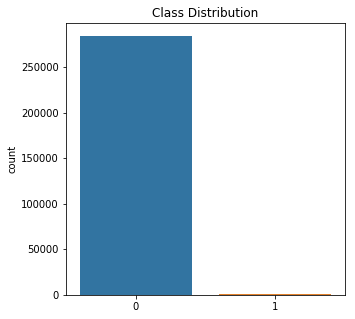

0    99.83
1     0.17
Name: Class, dtype: float64


In [5]:
# target variable distribution
plt.figure(figsize = (5,5))
_ = sns.barplot(x = df.Class.unique(), y = df.Class.value_counts())
_.set(title = 'Class Distribution', ylabel = "count")
plt.show()

frauds = df.Class.value_counts(normalize = True).round(4)*100
print(frauds)

The 'Class' is our dependent variable and the above-depicted figure shows that most of the transactions (99.83%) are non-fraud and only 0.17% of them are fraud which means the class distribution is very unbalanced. In the dataset, the number of negative samples is very large meaning that the false positive rate increases more slowly. 

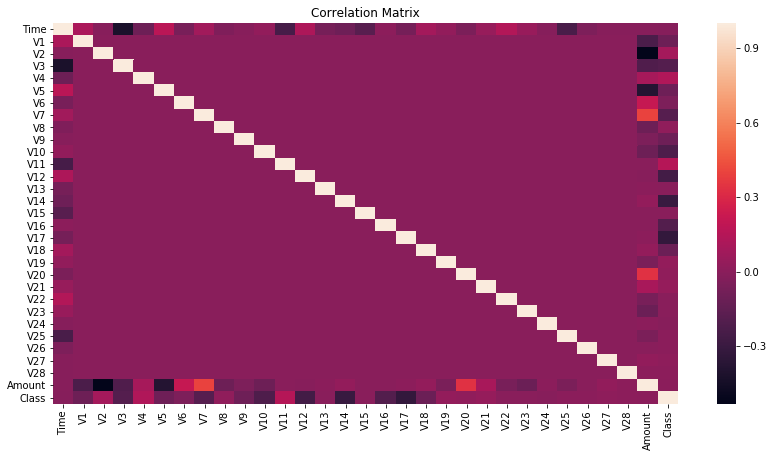

In [6]:
# correlation matrix
plt.figure(figsize = (14,7))
corr_mat = df.corr()
_ = sns.heatmap(corr_mat)
_.set(title = 'Correlation Matrix')
plt.show()

From the correlation heatmap, we can observe very low (mostly zero) multicollinearity among the features.  This is good, but since the dataset is imbalanced, we cannot use this as a reference. To see the correlation among features better, I'll undersample majority class manually and plot the correlation matrix again. This is only to gather a basic sense of our data. 

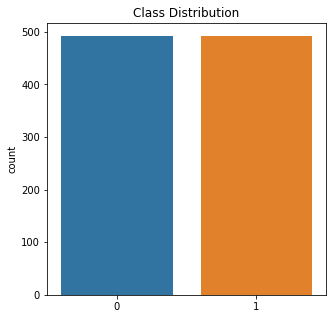

In [7]:
# undersampling majority class manually
# shuffle the dataframe 

df.sample(frac=1, random_state = 42)

X = df[df.Class == 1]
Y = df[df.Class == 0][:492] # we have 492 frauds out of 284,807 transactions

sampled_df = pd.concat([X, Y])
# check the class distribution
plt.figure(figsize = (5,5))
_ = sns.barplot(x = sampled_df.Class.unique(), y = sampled_df.Class.value_counts())
_.set(title = 'Class Distribution', ylabel = "count")
plt.show()

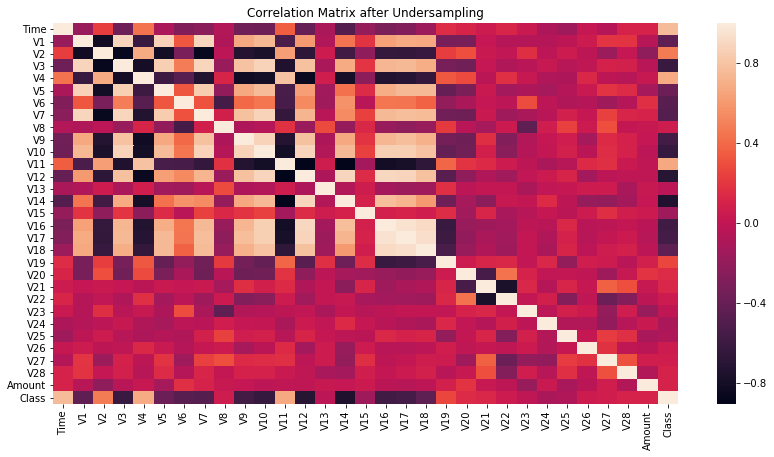

In [8]:
# correlation matrix
plt.figure(figsize = (14,7))
corr_mat = sampled_df.corr()
_ = sns.heatmap(corr_mat)
_.set(title = 'Correlation Matrix after Undersampling')
plt.show()

It is worth to mention the higher the correlation between the features and class(either positive or negative), the higher the probability of fraud. 

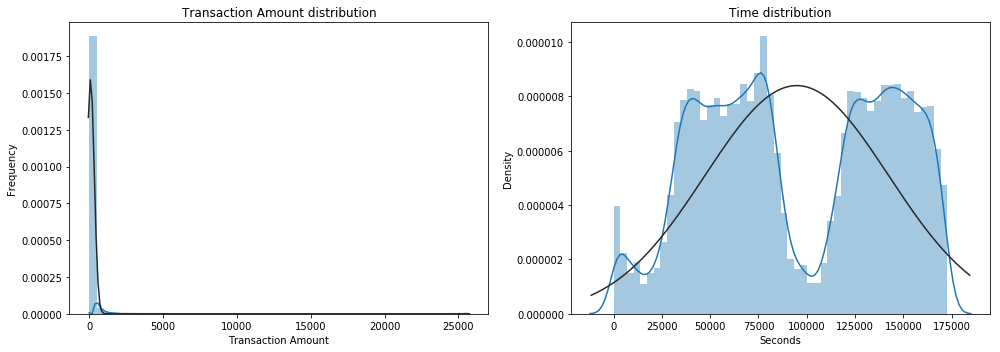

In [9]:
# Transaction Amount distribution
plt.figure(figsize = (14,5))
plt.subplot(121)
_ = sns.distplot(df.Amount, fit = norm)
_.set(title = 'Transaction Amount distribution', xlabel = 'Transaction Amount', ylabel = 'Frequency')

# Time distribution
plt.subplot(122)
_ = sns.distplot(df.Time, fit = norm)
_.set(title = 'Time distribution', xlabel = 'Seconds', ylabel = 'Density')
plt.tight_layout()
plt.show()

The 'Amount' and 'Time' distributions are not normal. I don't want to remove them, but scale. 
Now let's check for outliers in the data. I'll use Univariate approach to detect them and remove if needed.

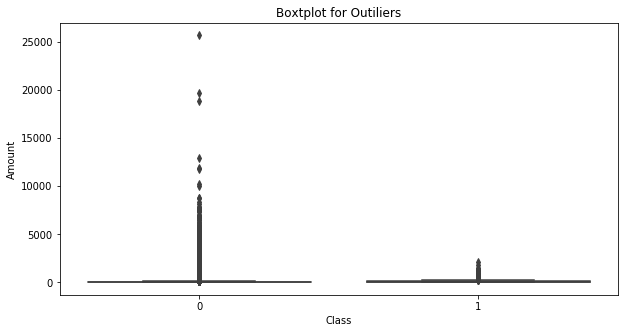

In [10]:
# Boxplot to detect outliers
plt.figure(figsize = (10,5))
_ = sns.boxplot(x = 'Class', y = 'Amount', data = df)
_.set(title = 'Boxtplot for Outiliers')
plt.show()

We have a huge number of outliers. And we can observe that most of the fraudulent transactions have Amount less than 2000. As the number of fraud transactions is very low, I don't want to remove them even if there are some outliers. 

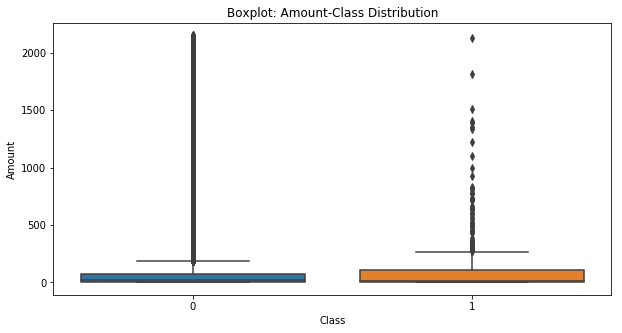

In [11]:
#p = np.percentile(df['Amount'], [2, 97])
# filter Cost columns from outliers
#new_df = df[(df['Amount'] > p[0]) & (df['Amount'] < p[1])]
plt.figure(figsize = (10,5))
new_df = df[df.Amount <= 2150]
_ = sns.boxplot(x = 'Class', y = 'Amount', data = new_df)
_.set(title = 'Boxplot: Amount-Class Distribution')
plt.show()

# Data Preparation
The first thing I need to do is to normalize the Amount and Time variables. Then I'll figure out which sampling method is good for me considering the computation power of my device.

In [12]:
# normalize Amount feature
scaler  = StandardScaler()
new_df['scaled_amount'] = scaler.fit_transform(new_df['Amount'].values.reshape(-1, 1))
new_df['scaled_time'] = scaler.fit_transform(new_df['Time'].values.reshape(-1,1))
new_df = new_df.drop(['Time', 'Amount'], axis = 1)
new_df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.386246,-1.996514
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.444753,-1.996514


To deal with the imbalanced data I have 3 options:
 - Oversampling
 - Undersampling
 - Combination of over- and under-sampling (Hybrid method)

I plan to create up to 8 different classification models and compare them. As the dataset is huge, the computational power of my device does not allow me to apply oversampling techniques(e.g. SMOTE) and test my models. In this case, undersampling could be very helpful and cost-effective.
I've tried RandomUnderSampler from the imblearn library, and it reduced the number of data points to 982 which might be unreliable, in my opinion. Then I applied hybrid and undersampling methods. 
#### Hybrid approach:
Imbalanced-learn has two hybrid modules to apply to the dataset in order to fix the imbalanced class distribution problem: SMOTEENN and SMOTETomek.
Because SMOTEENN tends to clean more noisy samples than SMOTETomek, it was my choice to create more accurate models.
#### Back to undersampling:
Though undersampling removed most of the data to reach the balance in class distribution, I compared these two sampling methods, and to my surprise I got more accurate results with RandomUnderSampler than SMOTEENN. And the running time of the models also decreased.

In [13]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from collections import Counter

# for faster computation I'll get a sample from original dataset.
# data = new_df.sample(frac = 0.05, random_state = 42)

X = new_df.drop('Class', axis = 1)
Y = new_df.Class


#sss = StratifiedShuffleSplit(n_splits=10)
#for train_index, test_index in sss.split(X, Y):
#    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 42, stratify=new_df.Class)

# dealing with class imbalance in training set using SMOTEENN
# smote_enn = SMOTEENN()

# dealing with class imbalance in training set using RandomUnderSampler
rus = RandomUnderSampler()
X_s, Y_s = rus.fit_sample(X, Y)


print(X_train.shape)
print(X_test.shape)

count = np.bincount(Y_s)
print('number of 0\'s {} \nnumber of 1\'s {}'.format(
        count[0], count[1]))

(227375, 30)
(56844, 30)
number of 0's 492 
number of 1's 492


To conclude data pre-processing, I will train the models on the undersampled dataset and validate them on the test set with the 56827 transactions.

# Classification Models
To predict the outcome variable I'll test a few classification algorithms and compare their performance. For this specific problem(credit fraud) I want to minimize the recall. False Negative predictions mean that the model fails to identify True credit card frauds and labels them as non-fraud transactions. <br>

Before testing models, I'll define a function to minimize workload.

In [14]:
# define a function to fit and predict ML models
def run_model(mod, model_name, X_train, Y_train, X_test, Y_test):
    
    """This function gets classification model, its name, training and test
    sets as inputs and returns model's accuracy score thru 5 fold cross-validation.
    The function also calculates Type I & II errors as well as Recal, Precision & F1 scores of the model.
    
    Parameters
    ----------
    mod: classifier
    model_name (str): classifier's name
    X_train: the training data set
    Y_train: the set of labels to all the data in X_train
    X_test: the test data set
    Y_test: the set of labels to all the data in X_test
    
    Returns
    -------
    str:
        model name
    float:
        Type I & Type II errors
    float: 
        Accuracy score
    float:
        5 folds cross-validation accuracy score
    float:
        Recall score
    float:
        Precision score
    float:
        F1 score
    plotted confusion matrix figure   
    
    """
    print(model_name + '\n')
    mod.fit(X_train,Y_train)
    Y_ = mod.predict(X_test)
    
    print('Accuracy Score: ' + str(accuracy_score(Y_test, Y_)))

    # cross validation
    cv = KFold(n_splits=10)
    cvs = cross_val_score(mod, X_train, Y_train, cv=cv)
    print("10 Folds Cross Validation Score Statistics: %0.5f (+/- %0.5f)" % (cvs.mean(), cvs.std() * 2))
    
    # accuracy tables.
    table_acc = pd.crosstab(Y_test, Y_, margins=True)

    tI_errors = table_acc.loc[0.0,1.0] / table_acc.loc['All','All']
    tII_errors = table_acc.loc[1.0,0.0] / table_acc.loc['All','All']
    print((
    '\nPercent Type I errors: {}\n'
    'Percent Type II errors: {}\n').format(tI_errors, tII_errors))
 
    print('Recall Score: ', recall_score(Y_test, Y_))
    print('Precision Score: ', precision_score(Y_test, Y_))
    print('F1 Score: ', f1_score(Y_test, Y_))

    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(table_acc, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("predicted Y values")
    plt.ylabel("actual Y values")
    plt.show()


In [15]:
# define a function to calculate and plot ROC curve
def run_roc_auc(model, model_name, X_test, Y_test):
    
    """The module gets classification model, its name and test
    sets as inputs and returns the plotted ROC cure for specific model.
    
    Parameters
    ----------
    mod: classifier
    model_name (str): classifier's name
    X_test: the test data set
    Y_test: the set of labels to all the data in X_test
    
    Returns
    -------
    plotted ROC curve 
    
    """
    cv = KFold(n_splits=5)
    #mod_predict = cross_val_predict(model, X_train, Y_train, cv = cv)    
    # calculate roc curve
    mod_fpr, mod_tpr, mod_threshold = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    
    # plot roc curve
    plt.figure(figsize=(10,16))
    plt.subplot(211)
    plt.title('ROC curve for '+ model_name, fontsize=14)
    plt.plot(mod_fpr, mod_tpr, label= model_name + ' AUC Score: {:.4f}'.format(roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
    # plot precisiona-recall curve
    y_score = model.predict_proba(X_test)[:,-1]
    precision, recall, _ = precision_recall_curve(Y_test, y_score)
    average_precision = average_precision_score(Y_test, y_score)
    
    plt.subplot(212)
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(model_name +' Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    
        
    plt.show()

## Model 1. Gaussian Naive Bayes

Gaussian Naive Bayes

Accuracy Score: 0.9687741890085145
10 Folds Cross Validation Score Statistics: 0.91745 (+/- 0.12547)

Percent Type I errors: 0.03103229892336922
Percent Type II errors: 0.00019351206811624798

Recall Score:  0.8877551020408163
Precision Score:  0.04700162074554295
F1 Score:  0.08927655207798871


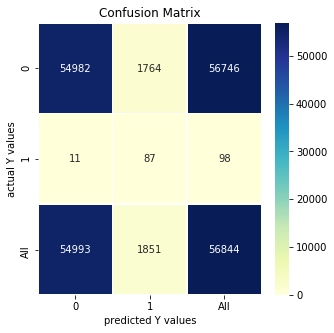

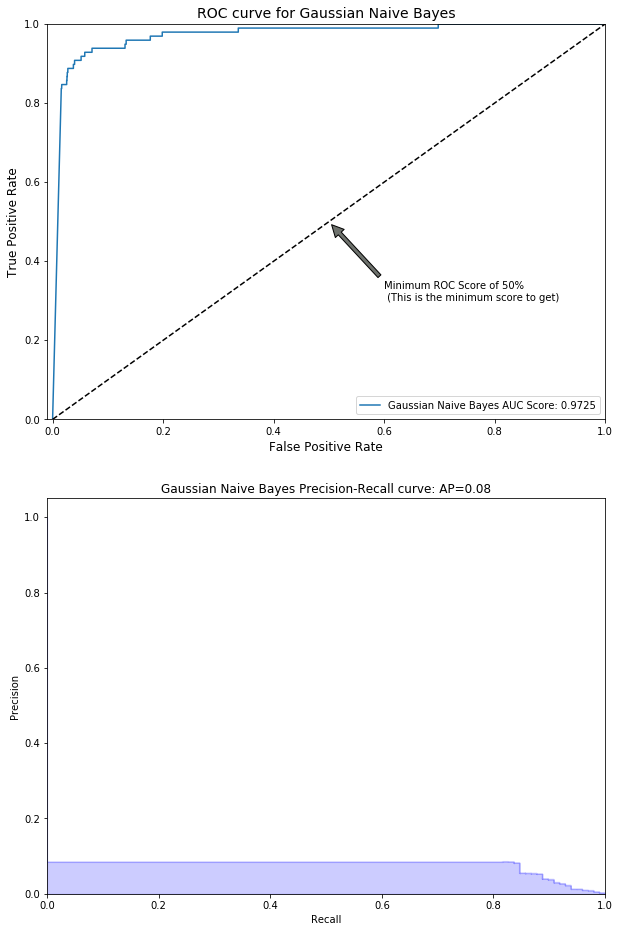

In [16]:
# Gaussian Naive Bayes
gnb = naive_bayes.GaussianNB()
run_model(gnb, 'Gaussian Naive Bayes', X_s, Y_s, X_test, Y_test)

# plot ROC cure for Gaussian NB
run_roc_auc(gnb, 'Gaussian Naive Bayes', X_test, Y_test)

## Model 2. Logistic Regression (Ridge regularization)

In [17]:
# looking for the best C value
c_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_lr = GridSearchCV(linear_model.LogisticRegression(penalty='l2'), c_values, cv = 5)
grid_search_lr.fit(X_s, Y_s)
grid_search_lr.best_params_

{'C': 1000}

Logistic Regression

Accuracy Score: 0.9739286468228837
10 Folds Cross Validation Score Statistics: 0.92879 (+/- 0.09310)

Percent Type I errors: 0.025948209133769617
Percent Type II errors: 0.00012314404334670326

Recall Score:  0.9285714285714286
Precision Score:  0.05810983397190294
F1 Score:  0.10937500000000001


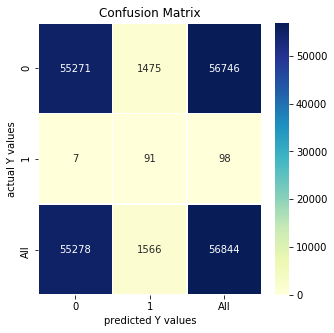

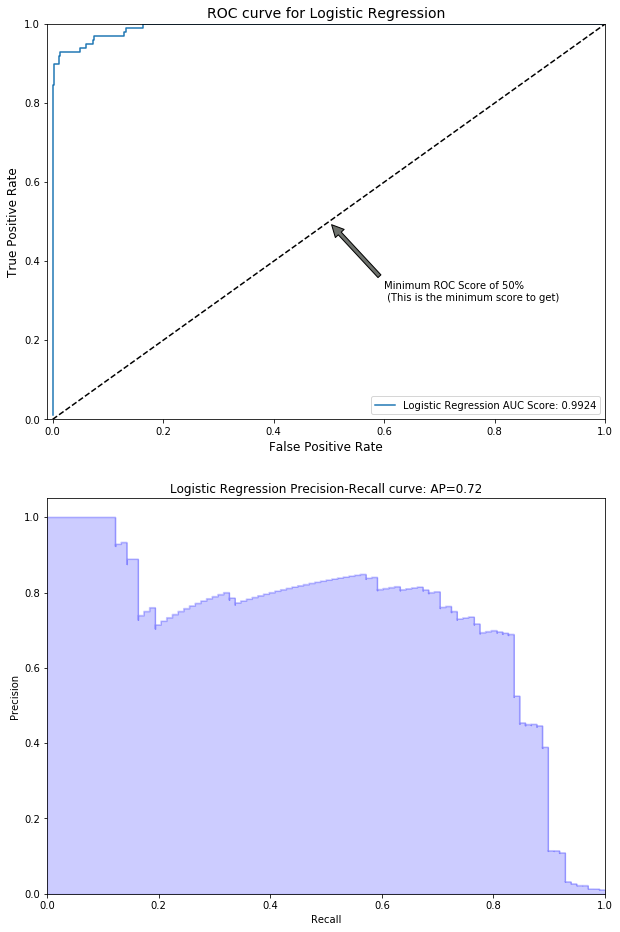

In [18]:
# Logistic Regression Ridge technique
lr = linear_model.LogisticRegression(penalty = 'l2', C = 0.1)
run_model(lr, 'Logistic Regression', X_s, Y_s, X_test, Y_test)
# plot ROC curve for Logistic Regression
run_roc_auc(lr, 'Logistic Regression', X_test, Y_test)

## Model 3. Suppor Vector Classifier

In [19]:
# parameter tuning with GridSearchCV
c_values = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': c_values, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid = param_grid, cv=5)
grid_search.fit(X_s, Y_s)
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

Support Vector Classifier

Accuracy Score: 0.9693723172190557
10 Folds Cross Validation Score Statistics: 0.92365 (+/- 0.08342)

Percent Type I errors: 0.030504538737597637
Percent Type II errors: 0.00012314404334670326

Recall Score:  0.9285714285714286
Precision Score:  0.04986301369863014
F1 Score:  0.09464378575143007


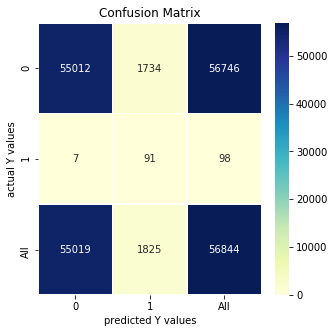

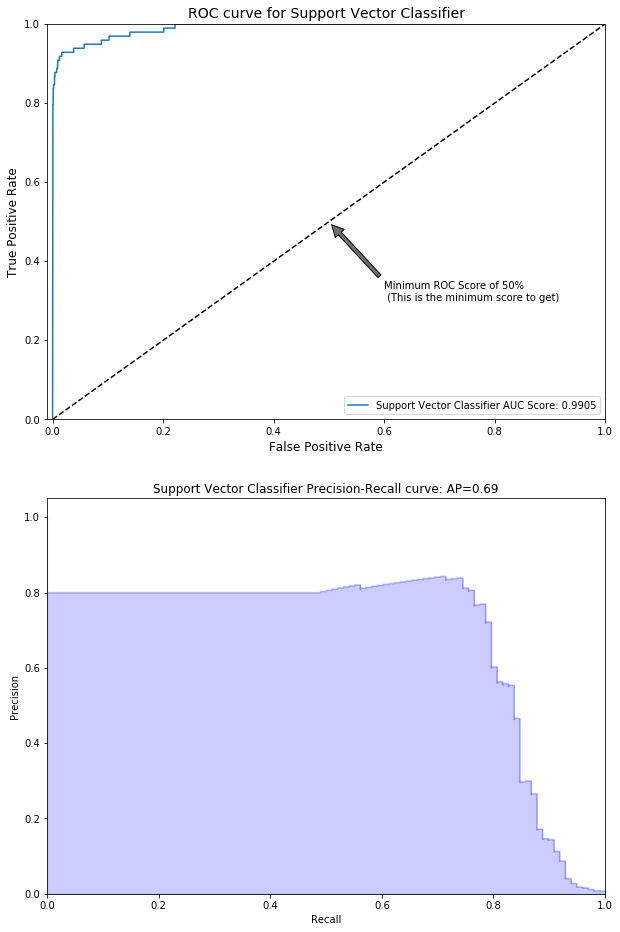

In [20]:
# Support Vector Classifier
svc = svm.SVC(kernel = 'linear', C = 10, gamma = 0.001, probability = True)
run_model(svc, 'Support Vector Classifier', X_s, Y_s, X_test, Y_test)

# ROC curve for SVC
run_roc_auc(svc, 'Support Vector Classifier', X_test, Y_test)

## Model 4. Random Forest Classifier

In [21]:
# prameter tuning with GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
             'max_depth': [2, 4, 6, 8, 10],
             'min_samples_leaf': [2,12],
             'bootstrap': [True, False]}
grid_search = GridSearchCV(ensemble.RandomForestClassifier(), param_grid = param_grid, cv=5)
grid_search.fit(X_s, Y_s)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'min_samples_leaf': 12,
 'n_estimators': 200}

Random Forest Classifier

Accuracy Score: 0.9790127366124833
10 Folds Cross Validation Score Statistics: 0.92564 (+/- 0.10736)

Percent Type I errors: 0.020969671381324325
Percent Type II errors: 1.759200619238618e-05

Recall Score:  0.9897959183673469
Precision Score:  0.07525213343677269
F1 Score:  0.13987022350396539


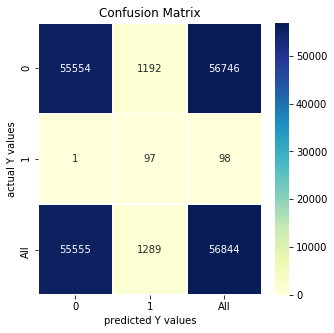

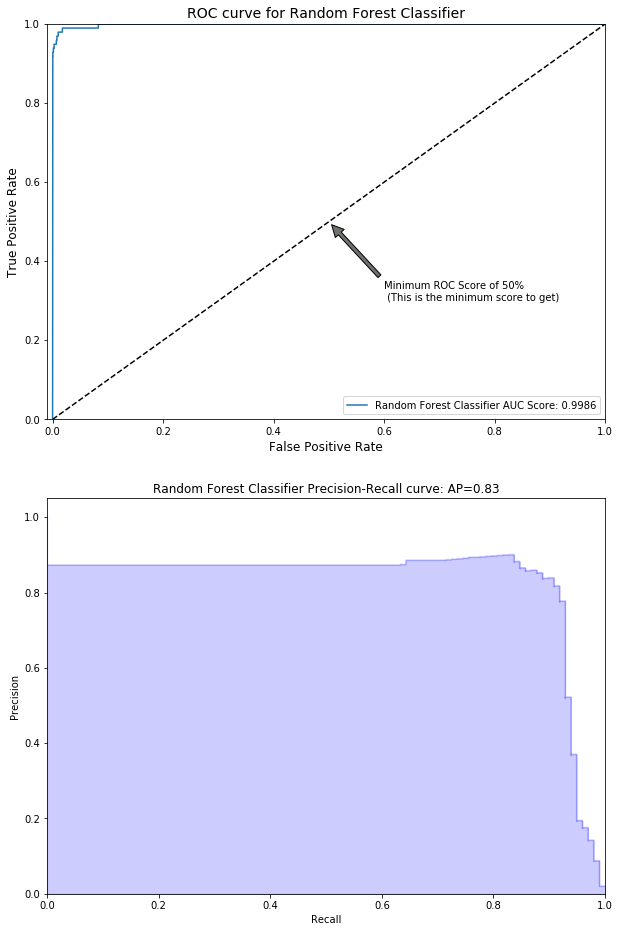

In [22]:
params = {'bootstrap': False,
 'max_depth': 8,
 'min_samples_leaf': 2,
 'n_estimators': 300}
rfc = ensemble.RandomForestClassifier(**params)
run_model(rfc, 'Random Forest Classifier', X_s, Y_s, X_test, Y_test)

# plot ROC curve for Random Forest Classifier
run_roc_auc(rfc, 'Random Forest Classifier', X_test, Y_test)

## Model 5. Stochastic Gradient Boosting Classifier

In [23]:
# create the parameter grid based on the results of random search
from sklearn.grid_search import RandomizedSearchCV
param_grid = {
    'min_samples_leaf': [3, 10],
    'min_samples_split': [2, 12],
    'max_depth': [2, 50],
    'n_estimators': [100, 500, 1500],
    'loss': ['exponential', 'deviance'],
    'subsample': [0.1, 1]}

rand = RandomizedSearchCV(ensemble.GradientBoostingClassifier(), param_distributions=param_grid,
                           cv=10)
rand.fit(X_s, Y_s)
rand.best_params_

{'subsample': 1,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'loss': 'exponential'}

Gradient Boosting Classifier

Accuracy Score: 0.9698297093800577
10 Folds Cross Validation Score Statistics: 0.91348 (+/- 0.12805)

Percent Type I errors: 0.03011751460136514
Percent Type II errors: 5.277601857715854e-05

Recall Score:  0.9693877551020408
Precision Score:  0.05257332595462092
F1 Score:  0.09973753280839895


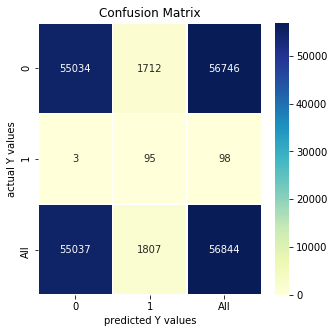

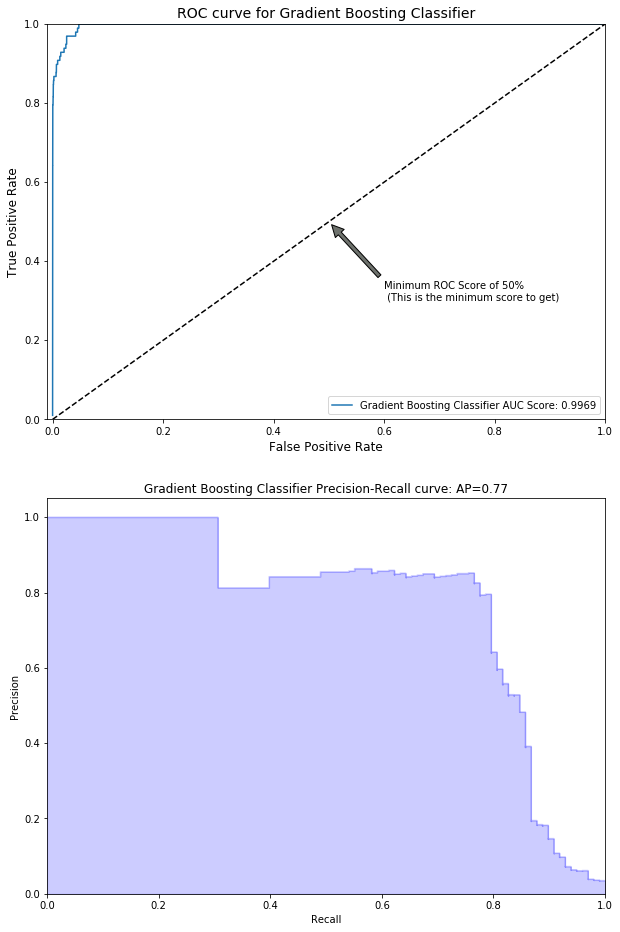

In [24]:
gbc = ensemble.GradientBoostingClassifier(**rand.best_params_)
run_model(gbc, 'Gradient Boosting Classifier', X_s, Y_s, X_test, Y_test)

# ROC curve for Gradient Boosting Classifier
run_roc_auc(gbc, 'Gradient Boosting Classifier', X_test, Y_test)

## Model 6.  AdaBoost Classifier

AdaBoost Classifier

Accuracy Score: 0.9469425093237633
10 Folds Cross Validation Score Statistics: 0.82783 (+/- 0.55697)

Percent Type I errors: 0.05305749067623672
Percent Type II errors: 0.0

Recall Score:  1.0
Precision Score:  0.03147077713551702
F1 Score:  0.06102117061021171


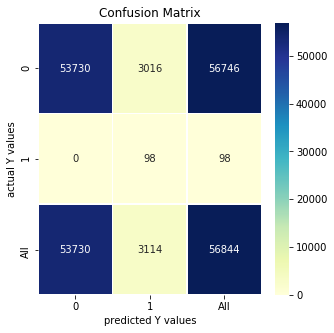

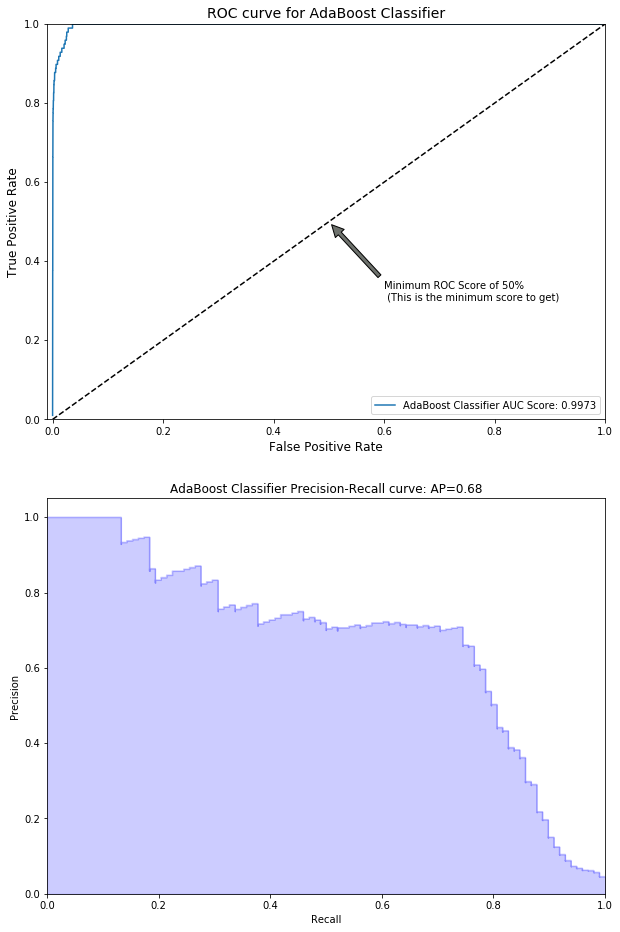

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
run_model(ada, 'AdaBoost Classifier', X_s, Y_s, X_test, Y_test)

# ROC curve for AdaBoost classifier
run_roc_auc(ada, 'AdaBoost Classifier', X_test, Y_test)

## Model 7. Voting Ensemble Classifier
The last model I want to fit is the voting ensemble model. I'll combine the predictions of Logistic Regression, Decision Tree and Gaussian Naive Bayes Classifiers. Then Voting Classifier will wrap the models and average the predictions of the sub-models when asked to make predictions for new data.

Voting Ensemble

Accuracy Score: 0.9720463021602984
10 Folds Cross Validation Score Statistics: 0.92971 (+/- 0.11572)

Percent Type I errors: 0.027830553796354938
Percent Type II errors: 0.00012314404334670326

Recall Score:  0.9285714285714286
Precision Score:  0.05439330543933055
F1 Score:  0.10276679841897234


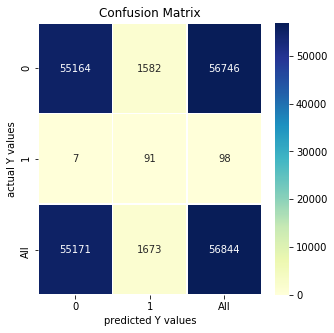

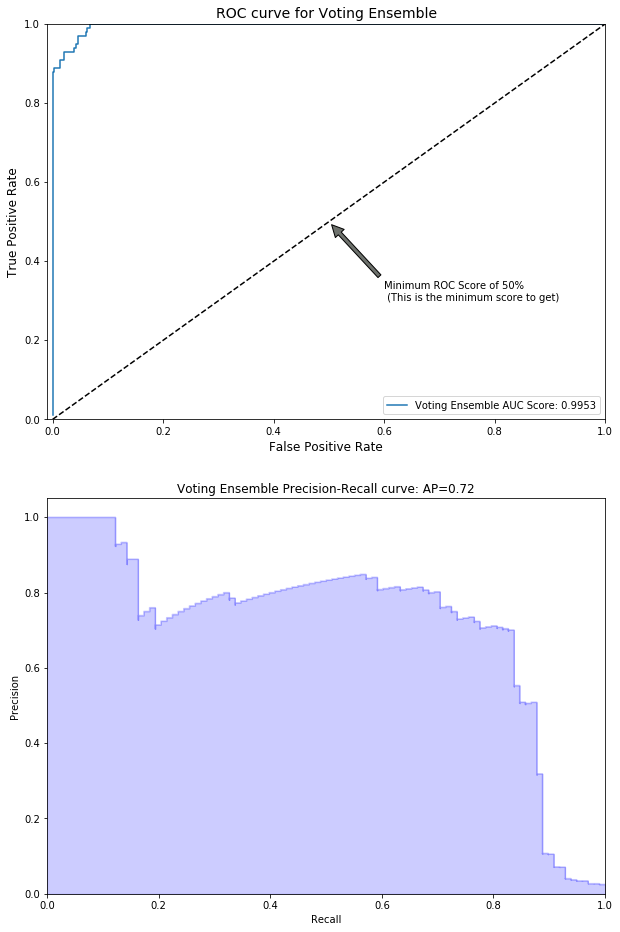

In [26]:
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=42)
# create the sub models
estimators = []

lr  = linear_model.LogisticRegression(penalty = 'l2', C=0.1)
dtc = DecisionTreeClassifier()
svc = svm.SVC(C = 10, gamma = 0.001)
estimators.append(('logistic regression', lr))
#estimators.append(('support vector machine', svc))
estimators.append(('gaussian naive bayes', gnb))
estimators.append(('decision tree classifier', dtc))
# create the ensemble model
ensemble_model = ensemble.VotingClassifier(estimators, voting = 'soft')
run_model(ensemble_model, 'Voting Ensemble', X_s, Y_s, X_test, Y_test)

# ROC curve for Voting Ensemble
run_roc_auc(ensemble_model, 'Voting Ensemble', X_test, Y_test)

## Model 8. Classifier including inner balancing samplers: Balanced Bagging Classifier

Imbalanced data is a very sensitive issue to deal with. So far, I trained models on undersampled dataset due to limited computational power of my computer. I understand that this is very low number to test the model performance. Now, I would like to apply BalancedBaggingClassifier which allows me resample each subset of data before to train each estimator of the ensemble.

Balanced Bagging Classifier

Accuracy Score: 0.9558792484694955
10 Folds Cross Validation Score Statistics: 0.95722 (+/- 0.00699)

Percent Type I errors: 0.043997607487157836
Percent Type II errors: 0.00012314404334670326

Recall Score:  0.9285714285714286
Precision Score:  0.03510802469135803
F1 Score:  0.06765799256505578


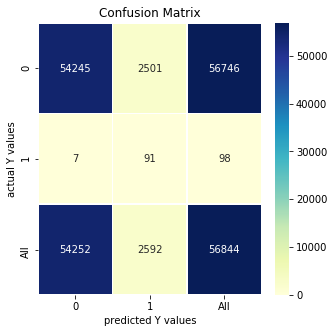

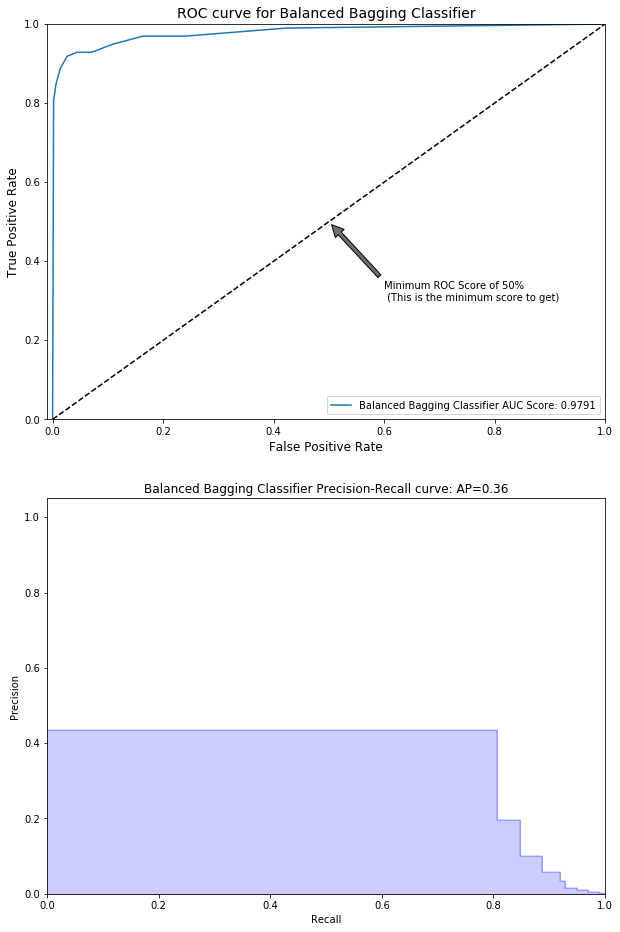

In [27]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                replacement=False,
                                 random_state=0)
run_model(bbc, 'Balanced Bagging Classifier', X_train, Y_train, X_test, Y_test)

# ROC curve for Voting Ensemble
run_roc_auc(bbc, 'Balanced Bagging Classifier', X_test, Y_test)

# Conclusion
Here is the overview of the models performance:

### Gaussian Naive Bayes
 - Accuracy: 0.92 (std: 0.12)
 - Recall: 0.89
 - Precision: 0.05
 - F1: 0.09
 - AUC Score: 0.9725
 - AP:  0.08

### Logistic Regression (Lasso)
 - Accuracy: 0.93 (std: 0.09)
 - Recall: 0.93
 - Precision: 0.06
 - F1: 0.11
 - AUC Score: 0.9924
 - AP:  0.72

### Support Vector Classifier
 - Accuracy: 0.92 (std: 0.08)
 - Recall: 0.93
 - Precision: 0.05
 - F1: 0.09
 - AUC Score: 0.9905
 - AP:  0.69

### Random Forest Calssifier
 - Accuracy: 0.93 (std: 0.1)
 - Recall: 0.99
 - Precision: 0.08
 - F1: 0.13
 - AUC Score: 0.9986
 - AP:  0.83

### Stochastic Gradient Boosting
 - Accuracy: 0.91 (std: 0.13)
 - Recall: 0.96
 - Precision: 0.05
 - F1: 0.1
 - AUC Score: 0.9969
 - AP:  0.77
 
### AdaBoost Classifier
 - Accuracy: 0.82 (std: 0.55)
 - Recall: 1
 - Precision: 0.03
 - F1: 0.06
 - AUC Score: 0.9973
 - AP:  0.68
 
### Voting Ensemble Model
 - Accuracy: 0.93 (std: 0.12)
 - Recall: 0.93
 - Precision: 0.05
 - F1: 0.1
 - AUC Score: 0.9953
 - AP:  0.72
 
### Balanced Bagging Classifier
 - Accuracy: 0.96 (std: 0.01)
 - Recall: 0.93
 - Precision: 0.04
 - F1: 0.07
 - AUC Score: 0.9791
 - AP:  0.36

In conclusion, since the dataset has imbalanced class distribution, none of the created models gives absolutely accurate results. However, I have relatively accurate models. As I mentioned before, for a bank, it's important to detect fraud transactions correctly as much as possible rather to label none-fraudulent transactions as fraud. That's why I focused on Recall score more since this accuracy measure allows us to understand how good our model detects fraudulent. The more Recall score, the more accurate is the model. However, single metric cannot be enough to evaluate the models. 

AUC score is representing the probability that a classifier will rank a randomly chosen positive observation higher than a randomly chosen negative observation, and thus it is a useful metric even for datasets with highly unbalanced classes.
Moreover, as the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of non-fraud examples is less important to the problem) we should use precision and recall. In similar scenarios, the FPR is not high, as we can observe from the results, because we have a lot of true negatives, due to the imbalanced data set. In our case, Precision score is the best to reflect how poor is the model's detection ability. The higher Precision score, the better a model detects positive samples. <br>

As a most accurate model, I would choose the one which is able to catch all frauds (highest Recall score) with the lowest number of False Positives (highest Precision score). 
For this specific task, from 8 classifiers only RandomForestClassifier has the highest AUC, Precision, F1, AP and Recall scores. 
